### Cifar-10 on VGG

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 128

In [4]:
tfms = ([pad(padding=4), crop(size=32, row_pct=(0,1), col_pct=(0,1)),
    flip_lr(p=0.5)], [])

In [5]:
data = ('data/cifar10', valid='test',
    ds_tfms=tfmdata_from_imagefolders, tfms=cifar_norm)

NameError: name 'data_from_imagefolder' is not defined

In [6]:
learn = Learner(data, wrn_22(), metrics=accuracy).to_fp16()

NameError: name 'data' is not defined

In [7]:
learn.fit_one_cycle(25, wd=0.4)

NameError: name 'learn' is not defined

### Approach 2

In [9]:
path = untar_data(URLs.CIFAR)

In [10]:
tfms = get_transforms(do_flip=False)

In [11]:
path.ls()

[PosixPath('/Users/lsouza/.fastai/data/cifar10/test'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/labels.txt'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/train')]

In [12]:
(path/'train').ls()

[PosixPath('/Users/lsouza/.fastai/data/cifar10/train/cat'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/train/dog'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/train/truck'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/train/bird'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/train/airplane'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/train/ship'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/train/frog'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/train/horse'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/train/deer'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/train/automobile')]

In [14]:
(path/'test').ls()

[PosixPath('/Users/lsouza/.fastai/data/cifar10/test/cat'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/test/dog'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/test/truck'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/test/bird'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/test/airplane'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/test/ship'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/test/frog'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/test/horse'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/test/deer'),
 PosixPath('/Users/lsouza/.fastai/data/cifar10/test/automobile')]

In [15]:
data = (ImageList.from_folder(path) #Where to find the data? -> in path and its subfolders
        .split_by_folder(train='train', valid='test')              #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .transform(tfms, size=32)       #Data augmentation? -> use tfms with a size of 64
        .databunch()) 

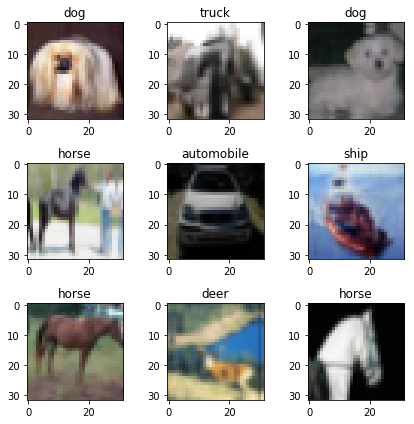

In [18]:
data.show_batch(3, figsize=(6,6), hide_axis=False)

In [19]:
dir(models)

['BasicBlock',
 'Darknet',
 'DynamicUnet',
 'ResLayer',
 'ResNet',
 'SqueezeNet',
 'UnetBlock',
 'WideResNet',
 'XResNet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'alexnet',
 'darknet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'squeezenet1_0',
 'squeezenet1_1',
 'unet',
 'vgg16_bn',
 'vgg19_bn',
 'wrn',
 'wrn_22',
 'xception',
 'xresnet',
 'xresnet101',
 'xresnet152',
 'xresnet18',
 'xresnet34',
 'xresnet50']

In [20]:
learn = cnn_learner(data, models.vgg19_bn, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /Users/lsouza/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 574769405/574769405 [01:11<00:00, 8047088.48it/s]


In [21]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Fal

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
learn.save('stage-1')

### Improving